# **Assignment : Anime Recommended System**

- 62010278 ณัฐพนธ์ สุขถาวร 
- 62010497 นิธิ น้อมประวัติ 
- 62010609 พักตร์ภูมิ ตาแพร่ 
- 62010948 สิรวิชญ์ สุขวัฒนาวิทย์ 

## **Import Libraries**

In [955]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## **Global Config**

In [956]:
sns.set_theme(style="whitegrid", palette="pastel")


class CONFIG:
    PLT_FIG_SIZE = plt.figaspect(8/19)


# color codes for python build-in print function
class PRINT_COLOR_CODE:
    BLUE = '\033[94m'
    CYAN = '\033[96m'
    GREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC = '\033[0m'


## **Define Util Functions**

In [957]:
# function to return list of columns which contained Nan value
def get_cols_contained_na(df):
    masked_na_df = df.isna()
    cols_with_na = df.columns[masked_na_df.any()].tolist()
    return cols_with_na


## **Import Datasets**

In [958]:
ANIME_CSV_PATH = "./datasets/anime.csv"
RATING_CSV_PATH = "./datasets/rating.csv"


In [959]:
anime_df = pd.read_csv(ANIME_CSV_PATH)
anime_df.rename(columns={'rating': 'average_rating'}, inplace=True)

rating_df = pd.read_csv(RATING_CSV_PATH)
rating_df.rename(columns={'rating': 'user_rating'}, inplace=True)

rating_merged_df = rating_df.merge(anime_df, on='anime_id', how='inner')


## **Data Exploration (1)**

### 1. **Anime Dataframe** Basic Info.

In [960]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(anime_df)}{PRINT_COLOR_CODE.ENDC}')

anime_df



List of columns that contain NaN values : ['genre', 'type', 'average_rating']


,anime_id,name,genre,type,episodes,average_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


,anime_id,average_rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


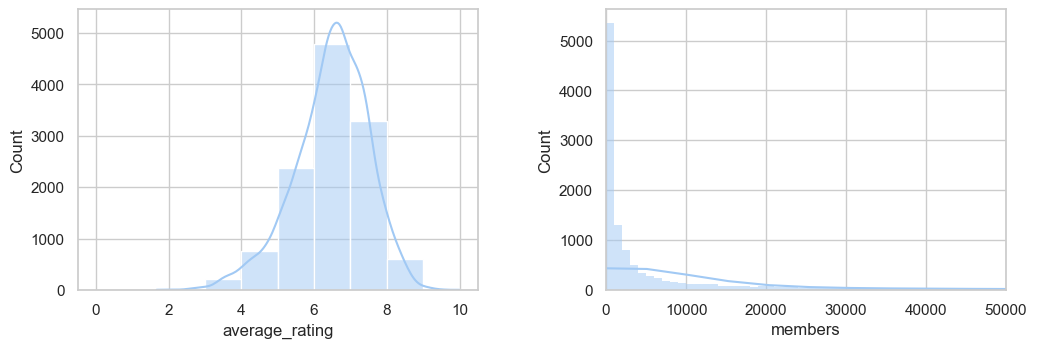

In [961]:
fig, axs = plt.subplots(ncols=2, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

sns.histplot(anime_df, x='average_rating', kde=True,
             binrange=[0, 10], binwidth=1, ax=axs[0])
sns.histplot(anime_df, x='members', kde=True,
             binwidth=1e3, ax=axs[1])
plt.xlim(0, 0.05e6)

anime_df.describe()


### 2. **Rating Dataframe** Basic info.

In [962]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(rating_df)}{PRINT_COLOR_CODE.ENDC}')

rating_df


List of columns that contain NaN values : []


,user_id,anime_id,user_rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


,user_id,anime_id,user_rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


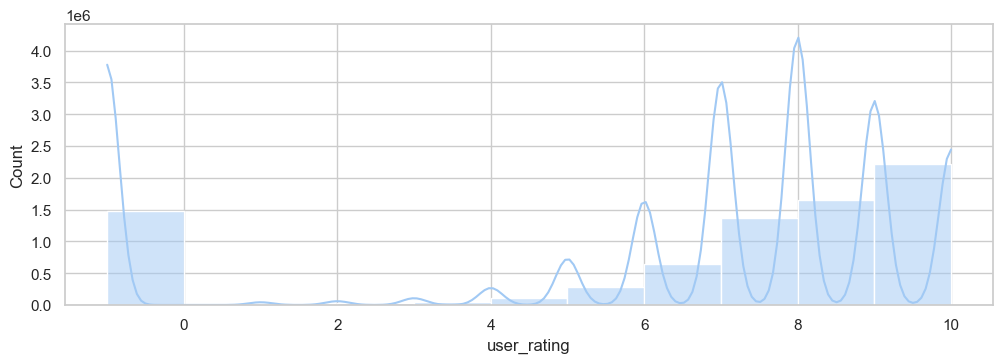

In [963]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

sns.histplot(rating_df, x='user_rating', kde=True,
             binrange=[-1, 10], binwidth=1, ax=axs)

rating_df.describe()


### 3. **Rating Merged Dataframe** Basic info.

In [964]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(rating_merged_df)}{PRINT_COLOR_CODE.ENDC}')

rating_merged_df



List of columns that contain NaN values : ['genre', 'type', 'average_rating']


,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
7813722,65682,30450,8,Dr. Slump: Hoyoyo! Arale no Himitsu Dai Koukai...,"Comedy, Sci-Fi, Shounen",Special,1,6.17,248
7813723,69497,33484,10,Shiroi Zou,"Action, Historical, Kids",Movie,1,4.71,45
7813724,70463,29481,-1,Kakinoki Mokkii,"Fantasy, Kids",Special,1,4.33,61
7813725,72404,34412,-1,Hashiri Hajimeta bakari no Kimi ni,Music,Music,1,6.76,239


,user_id,anime_id,user_rating,average_rating,members
count,7.813727e+06,7.813727e+06,7.813727e+06,7.813721e+06,7.813727e+06
mean,3.672795e+04,8.909045e+03,6.144036e+00,7.653127e+00,1.786208e+05
std,2.099795e+04,8.883923e+03,3.727796e+00,6.730287e-01,1.881764e+05
min,1.000000e+00,1.000000e+00,-1.000000e+00,1.670000e+00,2.900000e+01
25%,1.897400e+04,1.240000e+03,6.000000e+00,7.270000e+00,4.403000e+04
50%,3.679100e+04,6.213000e+03,7.000000e+00,7.680000e+00,1.104700e+05
75%,5.475700e+04,1.409300e+04,9.000000e+00,8.130000e+00,2.442680e+05
max,7.351600e+04,3.451900e+04,1.000000e+01,9.500000e+00,1.013917e+06


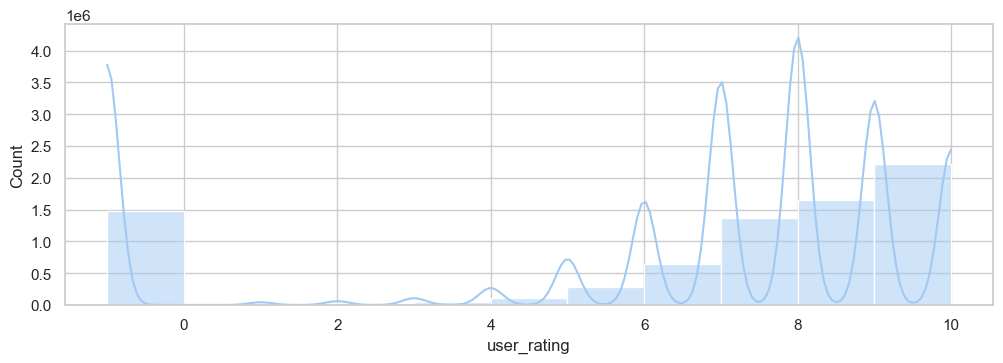

In [965]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

sns.histplot(rating_merged_df, x='user_rating', kde=True,
             binrange=[-1, 10], binwidth=1, ax=axs)

rating_merged_df.describe()


In [966]:
rating_merged_df.groupby(by='type').count().sort_values(
    by='user_id', ascending=False).rename(columns={'user_id': 'count'})[['count']]


,count
type,
TV,5283596
Movie,1051998
OVA,800307
Special,559366
ONA,91956
Music,26500


## **Data Cleansing (1)**

In Anime DataFrame, drop all anime types except `TV` and `Movie`

In [967]:
type_except_list = ["TV", 'Movie']

print(
    f"{PRINT_COLOR_CODE.FAIL}drop all anime types except {PRINT_COLOR_CODE.GREEN}{type_except_list}{PRINT_COLOR_CODE.ENDC}"
)

new_anime_df = anime_df[anime_df['type'].isin(type_except_list)]

drop_count = len(anime_df)-len(new_anime_df)
drop_percentage = (drop_count/len(anime_df))*100

print(
    f"{PRINT_COLOR_CODE.FAIL}drop {PRINT_COLOR_CODE.WARNING}{drop_count}{PRINT_COLOR_CODE.ENDC} {PRINT_COLOR_CODE.FAIL}rows{PRINT_COLOR_CODE.ENDC} ({drop_percentage:.4f}%)"
)

anime_df = new_anime_df

anime_df.reset_index(drop=True, inplace=True)
anime_df


drop all anime types except ['TV', 'Movie']
drop 6159 rows (50.097608589555875%)


,anime_id,name,genre,type,episodes,average_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
6130,3038,Senya Ichiya Monogatari,"Fantasy, Hentai",Movie,1,6.18,1394
6131,2755,Cleopatra,"Hentai, Historical",Movie,1,6.06,1709
6132,11141,Blue Seagull,"Action, Hentai",Movie,1,4.60,337
6133,20007,Hi Gekiga Ukiyoe Senya Ichiya,"Action, Hentai",Movie,1,1.92,129


In Anime DataFrame, drop less than `2000` members anime

In [968]:
min_n_members_threshold = 2000

print(
    f"{PRINT_COLOR_CODE.FAIL}drop less than {PRINT_COLOR_CODE.WARNING}{min_n_members_threshold}{PRINT_COLOR_CODE.ENDC} {PRINT_COLOR_CODE.FAIL}members anime{PRINT_COLOR_CODE.ENDC}"
)

new_anime_df = anime_df[anime_df['members'] >= min_n_members_threshold]

drop_count = len(anime_df)-len(new_anime_df)
drop_percentage = (drop_count/len(anime_df))*100

print(
    f"{PRINT_COLOR_CODE.FAIL}drop {PRINT_COLOR_CODE.WARNING}{drop_count}{PRINT_COLOR_CODE.ENDC} {PRINT_COLOR_CODE.FAIL}rows{PRINT_COLOR_CODE.ENDC} ({drop_percentage:.4f}%)"
)

anime_df = new_anime_df

anime_df.reset_index(drop=True, inplace=True)
anime_df


drop less than 2000 members anime
drop 3073 rows (50.089649551752245%)


,anime_id,name,genre,type,episodes,average_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
3057,32615,Youjo Senki,"Magic, Military",TV,Unknown,NaN,6652
3058,34284,Yuuki Yuuna wa Yuusha de Aru: Washio Sumi no Shou,"Drama, Fantasy, Magic, Slice of Life",TV,6,NaN,2593
3059,34445,Yuuki Yuuna wa Yuusha de Aru: Yuusha no Shou,"Drama, Fantasy, Magic, Slice of Life",TV,6,NaN,4439
3060,3220,Kanashimi no Belladonna,"Drama, Hentai",Movie,1,7.28,6599


join (inner) Rating Dataframe with Anime Dataframe `again`

In [969]:
rating_merged_df = rating_df.merge(anime_df, on='anime_id', how='inner')

rating_merged_df

,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
6303013,48766,15227,-1,Kono Sekai no Katasumi ni,"Drama, Historical",Movie,1,8.14,8028
6303014,49150,15227,9,Kono Sekai no Katasumi ni,"Drama, Historical",Movie,1,8.14,8028
6303015,72800,15227,10,Kono Sekai no Katasumi ni,"Drama, Historical",Movie,1,8.14,8028
6303016,48766,31418,-1,KanColle Movie,"Action, Military, School, Sci-Fi, Slice of Life",Movie,1,7.69,9439


## **Data Exploration (2)**

### 1. **Rating Merged Dataframe** Basic Info.

In [970]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(rating_merged_df)}{PRINT_COLOR_CODE.ENDC}')

rating_merged_df


List of columns that contain NaN values : ['average_rating']


,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
6303013,48766,15227,-1,Kono Sekai no Katasumi ni,"Drama, Historical",Movie,1,8.14,8028
6303014,49150,15227,9,Kono Sekai no Katasumi ni,"Drama, Historical",Movie,1,8.14,8028
6303015,72800,15227,10,Kono Sekai no Katasumi ni,"Drama, Historical",Movie,1,8.14,8028
6303016,48766,31418,-1,KanColle Movie,"Action, Military, School, Sci-Fi, Slice of Life",Movie,1,7.69,9439


,user_id,anime_id,user_rating,average_rating,members
count,6.303018e+06,6.303018e+06,6.303018e+06,6.303016e+06,6.303018e+06
mean,3.665848e+04,8.921206e+03,6.326634e+00,7.757043e+00,2.113461e+05
std,2.103370e+04,8.999300e+03,3.673903e+00,6.192702e-01,1.944164e+05
min,1.000000e+00,1.000000e+00,-1.000000e+00,3.630000e+00,2.005000e+03
25%,1.884800e+04,1.110000e+03,6.000000e+00,7.380000e+00,6.895100e+04
50%,3.651500e+04,6.165000e+03,8.000000e+00,7.770000e+00,1.511060e+05
75%,5.478200e+04,1.434500e+04,9.000000e+00,8.210000e+00,2.957820e+05
max,7.351600e+04,3.413600e+04,1.000000e+01,9.370000e+00,1.013917e+06


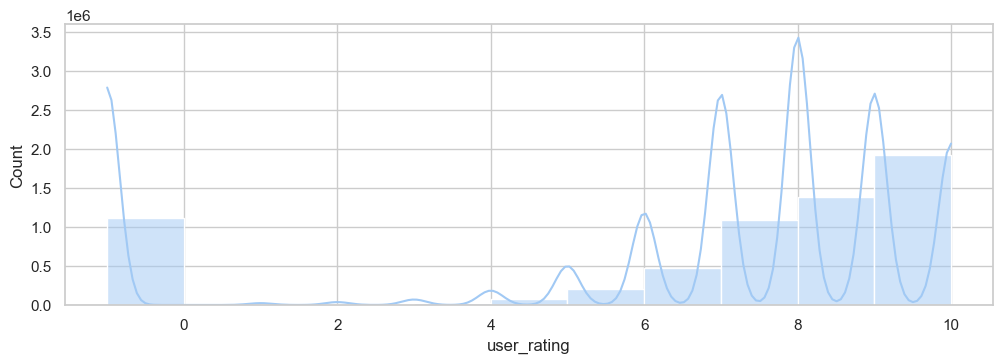

In [971]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

sns.histplot(rating_merged_df, x='user_rating', kde=True,
             binrange=[-1, 10], binwidth=1, ax=axs)

rating_merged_df.describe()


### 2. Compare **Anime Dataframe** vs **Rating Merged Dataframe**

In [972]:
rating_merged_droped_unrated_user_df = rating_merged_df.drop(
    rating_merged_df[rating_merged_df['user_rating'] < 0].index)

compare_anime_vs_rating_merged_df = rating_merged_droped_unrated_user_df.groupby(['anime_id']).agg({
    'members': 'mean',
    'user_id': 'count',
    'average_rating': 'mean',
    'user_rating': 'mean',
})
compare_anime_vs_rating_merged_df.rename(
    columns={
        'user_id': 'rating_merged: members (cal)',
        'user_rating': 'rating_merged: average_rating (cal)',
        'members': 'anime: members',
        'average_rating': 'anime: average_rating'
    },
    inplace=True)

print(f'{PRINT_COLOR_CODE.WARNING}Anime Dataframe vs Rating Merged Dataframe (droped users who have not rated anime){PRINT_COLOR_CODE.ENDC}\n')
print(
    f'{PRINT_COLOR_CODE.CYAN}Anime Dataframe{PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{anime_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')
print(
    f'{PRINT_COLOR_CODE.CYAN}Rating Merged Dataframe (droped users who have not rated anime){PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{compare_anime_vs_rating_merged_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')

compare_anime_vs_rating_merged_df


Anime Dataframe vs Rating Merged Dataframe (droped users who have not rated anime)

Anime Dataframe contains 3062 unique animes
Rating Merged Dataframe (droped users who have not rated anime) contains 2892 unique animes


,anime: members,rating_merged: members (cal),anime: average_rating,rating_merged: average_rating (cal)
anime_id,,,,
1,486824.0,13449,8.82,8.869433
5,137636.0,5790,8.40,8.439724
6,283069.0,9385,8.32,8.419393
7,64905.0,2169,7.36,7.533426
8,9848.0,308,7.06,7.198052
...,...,...,...,...
33421,36343.0,366,6.67,6.852459
33511,13657.0,1,7.14,8.000000
33513,14896.0,2,7.72,7.500000


## **Data Cleansing (2)**

In Rating Merged DataFrame, replace all instances of `user_rating` with `average_rating` for rows where user_rating == -1 (unrated anime).

In [973]:
rating_merged_df['user_rating'] = rating_merged_df.apply(
    lambda x: x['user_rating'] if x['user_rating'] > -1 else x['average_rating'], axis=1)

rating_merged_df.reset_index(drop=True, inplace=True)
rating_merged_df


,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,7.81,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8.00,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6.00,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,7.81,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,7.81,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
6303013,48766,15227,8.14,Kono Sekai no Katasumi ni,"Drama, Historical",Movie,1,8.14,8028
6303014,49150,15227,9.00,Kono Sekai no Katasumi ni,"Drama, Historical",Movie,1,8.14,8028
6303015,72800,15227,10.00,Kono Sekai no Katasumi ni,"Drama, Historical",Movie,1,8.14,8028
6303016,48766,31418,7.69,KanColle Movie,"Action, Military, School, Sci-Fi, Slice of Life",Movie,1,7.69,9439


## **Data Exploration (3)**

### 1. Compare **Anime Dataframe** vs **Rating Merged Dataframe**

In [974]:
rating_merged_replaced_unrated_user_df = rating_merged_df.drop(
    rating_merged_df[rating_merged_df['user_rating'] < 0].index)

compare_anime_vs_rating_merged_df = rating_merged_replaced_unrated_user_df.groupby(['anime_id']).agg({
    'members': 'mean',
    'user_id': 'count',
    'average_rating': 'mean',
    'user_rating': 'mean',
})
compare_anime_vs_rating_merged_df.rename(
    columns={
        'user_id': 'rating_merged: members (cal)',
        'user_rating': 'rating_merged: average_rating (cal)',
        'members': 'anime: members',
        'average_rating': 'anime: average_rating'
    },
    inplace=True)

print(f'{PRINT_COLOR_CODE.WARNING}Anime Dataframe vs Rating Merged Dataframe (after assigning average rating intead of user rating for users who have not rated anime){PRINT_COLOR_CODE.ENDC}\n')
print(
    f'{PRINT_COLOR_CODE.CYAN}Anime Dataframe{PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{anime_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')
print(
    f'{PRINT_COLOR_CODE.CYAN}Rating Merged Dataframe (after assigning average rating intead of user rating for users who have not rated anime){PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{compare_anime_vs_rating_merged_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')

compare_anime_vs_rating_merged_df


Anime Dataframe vs Rating Merged Dataframe (after assigning average rating intead of user rating for users who have not rated anime)

Anime Dataframe contains 3062 unique animes
Rating Merged Dataframe (after assigning average rating intead of user rating for users who have not rated anime) contains 2895 unique animes


,anime: members,rating_merged: members (cal),anime: average_rating,rating_merged: average_rating (cal)
anime_id,,,,
1,486824.0,15509,8.82,8.862867
5,137636.0,6927,8.40,8.433203
6,283069.0,11077,8.32,8.404211
7,64905.0,2629,7.36,7.503081
8,9848.0,413,7.06,7.162954
...,...,...,...,...
33513,14896.0,2,7.72,7.500000
33674,32041.0,1,NaN,NaN
33741,2303.0,23,6.82,7.229565


### 2. **Anime Dataframe** Top 10 Members and Top 10 Average Rating

[Text(0, 0, 'Kimi no Na wa.'),
 Text(1, 0, 'Fullmetal Alchemist: Brotherhood'),
 Text(2, 0, 'Gintama°'),
 Text(3, 0, 'Steins;Gate'),
 Text(4, 0, 'Gintama&#039;'),
 Text(5, 0, 'Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou'),
 Text(6, 0, 'Hunter x Hunter (2011)'),
 Text(7, 0, 'Gintama&#039;: Enchousen'),
 Text(8, 0, 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare'),
 Text(9, 0, 'Clannad: After Story')]

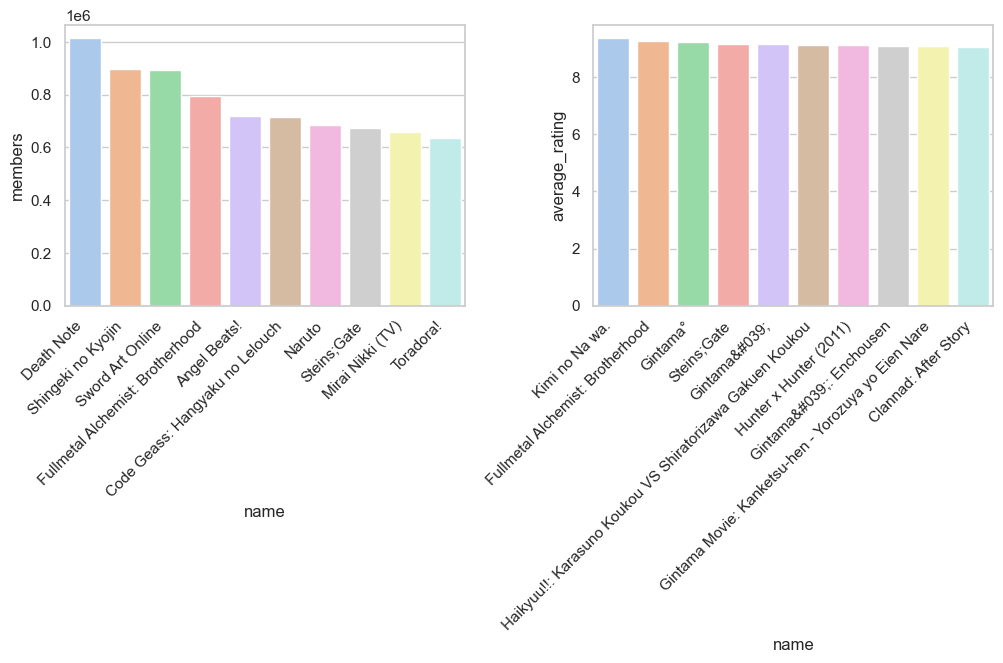

In [975]:
anime_top_10_members_df = anime_df.sort_values(
    by='members', ascending=False).head(10)
anime_top_10_rating_df = anime_df.sort_values(
    by='average_rating', ascending=False).head(10)

fig, axs = plt.subplots(ncols=2, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

plt_0 = sns.barplot(data=anime_top_10_members_df, x='name',
                    y='members', ax=axs[0])
plt_0.set_xticklabels(plt_0.get_xticklabels(),
                      rotation=45, horizontalalignment='right')

plt_1 = sns.barplot(data=anime_top_10_rating_df, x='name',
                    y='average_rating',  ax=axs[1])
plt_1.set_xticklabels(plt_1.get_xticklabels(),
                      rotation=45, horizontalalignment='right')


## **Recommended System (Content-based filtering)**

### 1. **Import Libraries**

In [976]:
import nltk


### 2. **Config**

In [977]:
stopwords = nltk.corpus.stopwords.words("english")
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/phukphoom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 3. **Define Util Functions**

In [978]:
# function to return list of keywords from the input text
def get_keywords(input_text):
    if input_text is np.NaN:
        return []

    input_text = input_text.lower()

    input_text = ''.join(
        [char for char in input_text if char.isalpha() or char.isspace()])

    return [ele for ele in input_text.split() if ele not in stopwords]


# funtions to return the jaccard similarity between two lists
def jaccard_similarity(x, y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))

    if (union_cardinality == 0):
        print(union_cardinality, x, y)

    return intersection_cardinality/float(union_cardinality)


### 4. **Implmenting Core**

In [979]:
class ContentBasedFiltering:
    WEIGHT_AVG_RATING = 0.7
    WEIGHT_GENRE = 0.3

    def __init__(self, ctb_user_rating_merged_df, ctb_anime_df):
        self.user_rating_merged_df = ctb_user_rating_merged_df.copy()
        self.anime_df = ctb_anime_df.copy()

    def suggest(self, n, picked_anime_id, debug=False):
        if self.anime_df[self.anime_df['anime_id'] == picked_anime_id].empty:
            raise ValueError(
                'Not found picked anime id ({picked_anime_id}) in self.anime_df')

        picked_anime_keywords = {
            'genre': get_keywords(self.anime_df[self.anime_df['anime_id'] == picked_anime_id]['genre'].tolist()[0])
        }

        if debug:
            print(
                f'{PRINT_COLOR_CODE.FAIL}{ContentBasedFiltering.WEIGHT_GENRE} Selected Anime Keywords (genre) : {PRINT_COLOR_CODE.WARNING}{picked_anime_keywords["genre"]}{PRINT_COLOR_CODE.ENDC}\n'
            )

        self.anime_df['keywords_genre'] = self.anime_df.apply(
            lambda x: get_keywords(x['genre']), axis=1)

        self.anime_df['ranking_score'] = self.anime_df.apply(
            lambda x:
            (ContentBasedFiltering.WEIGHT_AVG_RATING) *
            x['average_rating']/float(10)

            + (ContentBasedFiltering.WEIGHT_GENRE) *
            jaccard_similarity(
                picked_anime_keywords['genre'], x['keywords_genre']
            ),
            axis=1)

        return self.anime_df[self.anime_df['anime_id'] != picked_anime_id].sort_values(by='average_rating', ascending=False).sort_values(by='ranking_score', ascending=False).head(n)


### 5. **Evaluation**

In [980]:
anime_suggestion_size = 10


In [981]:
min_n_animes_threshold = 1000

In [982]:
user_selection_size = 300

print(f'{PRINT_COLOR_CODE.WARNING}select {PRINT_COLOR_CODE.GREEN}{user_selection_size} users{PRINT_COLOR_CODE.ENDC}')

selected_user_ids = np.random.choice(rating_merged_df.groupby('user_id').filter(
    lambda x: len(x) >= min_n_animes_threshold)['user_id'].unique(), size=user_selection_size
).tolist()
print(f'{PRINT_COLOR_CODE.WARNING}selected user ids (for evaluation) : {PRINT_COLOR_CODE.CYAN}{selected_user_ids}{PRINT_COLOR_CODE.ENDC}')


select 300 users
selected user ids (for evaluation) : [23023, 47849, 42635, 33480, 28521, 47849, 22434, 40273, 48766, 40604, 47849, 25497, 27648, 66021, 59643, 27364, 50264, 61110, 51693, 11339, 28196, 66742, 7345, 25497, 54539, 50264, 59643, 33480, 59406, 7345, 52371, 28521, 10419, 59406, 47849, 11536, 50264, 22434, 27364, 58343, 8149, 11536, 40604, 54539, 58233, 10419, 8115, 66021, 40273, 58378, 58343, 8149, 58233, 27648, 10283, 47849, 11536, 11339, 40604, 51693, 28521, 59643, 17095, 65840, 51216, 53698, 51216, 50264, 48766, 28521, 10419, 61110, 50264, 27648, 59643, 58517, 27364, 54539, 23023, 58517, 27648, 53698, 27364, 47849, 54713, 54713, 54713, 33285, 54713, 58378, 45659, 28196, 10419, 52371, 8115, 27648, 48766, 48766, 42635, 52371, 27648, 42635, 8149, 54713, 51693, 28521, 11339, 54539, 61110, 61110, 50264, 23023, 11339, 11339, 17095, 40604, 59406, 58517, 58517, 54713, 22815, 27648, 51270, 48766, 40273, 66742, 33480, 53698, 58378, 66021, 28521, 33285, 22815, 52371, 50264, 25497, 

#### 5.1. **Evaluation** using **Top-K Precision**

In [983]:
k = 5

print(
    f'Evaluation using {PRINT_COLOR_CODE.BOLD}{PRINT_COLOR_CODE.GREEN}Top-{k} Precision{PRINT_COLOR_CODE.ENDC}'
)


Evaluation using Top-5 Precision


In [984]:
avg_top_k_score_by_time_list = []
sum_top_k_score = 0
for selected_user_id in selected_user_ids:
    selected_user_rating_merged_df = rating_merged_df[rating_merged_df['user_id']
                                                      == selected_user_id]
    selected_user_rating_merged_df.reset_index(drop=True, inplace=True)

    selected_anime_id = np.random.choice(
        selected_user_rating_merged_df['anime_id'].unique(), size=1)[0]

    # print(
    #     f'\nTest by having user_id:{selected_user_id} pick anime_id:{selected_anime_id}'
    # )

    ctb_suggestion_df = ContentBasedFiltering(
        selected_user_rating_merged_df, anime_df
    ).suggest(n=anime_suggestion_size, picked_anime_id=selected_anime_id)

    top_k_score = len(set.intersection(
        *[set(ctb_suggestion_df['anime_id'].head(k)), set(selected_user_rating_merged_df['anime_id'])]))/float(k)

    # print(
    #     f'top_k_score : {top_k_score:.4f} (k = {k}, Suggest {len(ctb_suggestion_df)} animes, Answer {len(selected_user_rating_merged_df)-1} animes)'
    # )

    sum_top_k_score += top_k_score
    avg_top_k_score_by_time_list.append(
        sum_top_k_score/float(len(avg_top_k_score_by_time_list)+1))

print(
    f'\n{PRINT_COLOR_CODE.WARNING}avg_top_k_score : {PRINT_COLOR_CODE.GREEN}{avg_top_k_score_by_time_list[-1]}{PRINT_COLOR_CODE.ENDC}'
)



avg_top_k_score : 0.6853333333333335


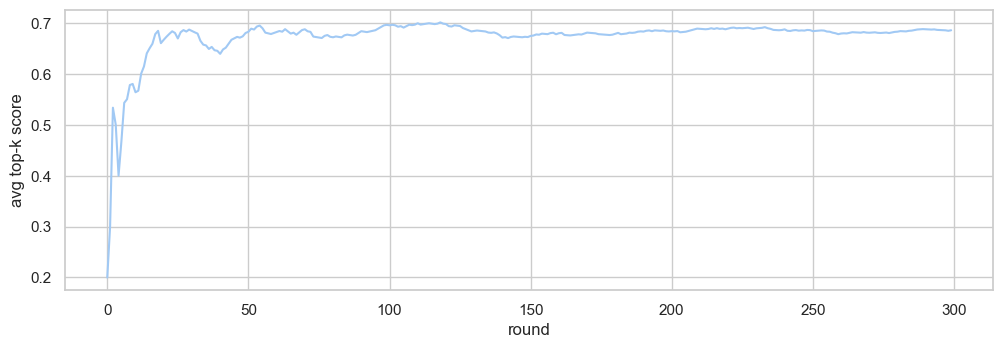

In [985]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

plt_0 = sns.lineplot(
    avg_top_k_score_by_time_list, ax=axs).set(xlabel='round', ylabel='avg top-k score')


#### 5.2. **Evaluation** using **AUC**

In [986]:
avg_auc_score_by_time_list = []
sum_auc_score = 0
for selected_user_id in selected_user_ids:
    selected_user_rating_merged_df = rating_merged_df[rating_merged_df['user_id']
                                                      == selected_user_id]
    selected_user_rating_merged_df.reset_index(drop=True, inplace=True)

    selected_anime_id = np.random.choice(
        selected_user_rating_merged_df['anime_id'].unique(), size=1)[0]

    # print(
    #     f'\nTest by having user_id:{selected_user_id} pick anime_id:{selected_anime_id}'
    # )

    core = ContentBasedFiltering(
        selected_user_rating_merged_df, anime_df
    )

    core.suggest(
        n=anime_suggestion_size, picked_anime_id=selected_anime_id)

    ctb_anime_actual_interect_df = core.anime_df[core.anime_df['anime_id'].isin(
        selected_user_rating_merged_df['anime_id'])].copy()
    ctb_anime_not_interect_df = core.anime_df[~core.anime_df['anime_id'].isin(
        selected_user_rating_merged_df['anime_id'])].copy()

    auc_score = 0

    n = len(ctb_anime_actual_interect_df) * len(ctb_anime_not_interect_df)

    ctb_anime_actual_interect_df['n_prime'] = ctb_anime_actual_interect_df.apply(
        lambda x: len(ctb_anime_not_interect_df[x['ranking_score'] > ctb_anime_not_interect_df['ranking_score']]), axis=1)
    ctb_anime_actual_interect_df['n_prime_2'] = ctb_anime_actual_interect_df.apply(
        lambda x: len(ctb_anime_not_interect_df[x['ranking_score'] == ctb_anime_not_interect_df['ranking_score']]), axis=1)

    n_prime = ctb_anime_actual_interect_df['n_prime'].sum()
    n_prime_2 = ctb_anime_actual_interect_df['n_prime_2'].sum()

    auc_score = (n_prime + (0.5 * n_prime_2)) / n

    # print(
    #     f'auc_score : {auc_score:.4f} (n = {n}, n\' = {n_prime} , n\" = {n_prime_2}) (actual_interect : {len(ctb_anime_actual_interect_df)}, not_interect : {len(ctb_anime_not_interect_df)})'
    # )

    sum_auc_score += auc_score
    avg_auc_score_by_time_list.append(
        sum_auc_score/float(len(avg_auc_score_by_time_list)+1))

print(
    f'\n{PRINT_COLOR_CODE.WARNING}avg_auc_score : {PRINT_COLOR_CODE.GREEN}{avg_auc_score_by_time_list[-1]}{PRINT_COLOR_CODE.ENDC}'
)



avg_auc_score : 0.5870889246053508


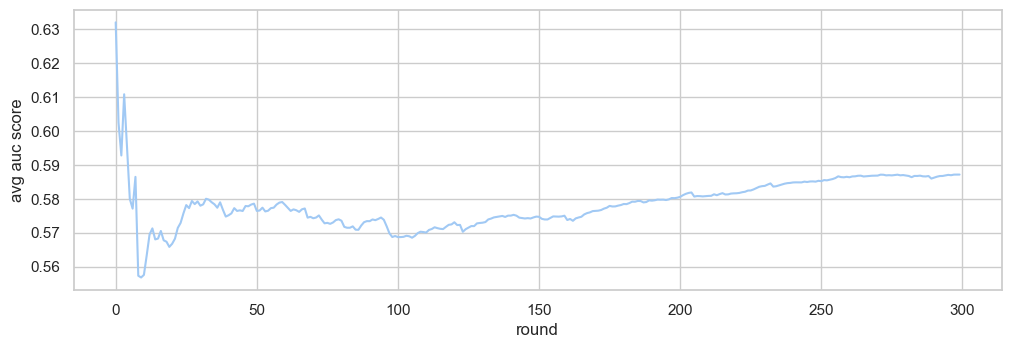

In [987]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

plt_0 = sns.lineplot(
    avg_auc_score_by_time_list, ax=axs).set(xlabel='round', ylabel='avg auc score')


### **6. Try Suggestion** using **Content-based filtering**

In [988]:
USER_RATING_CSV_PATH = "./tests/user_rating.csv"

In [989]:
user_rating_merged_df = pd.read_csv(USER_RATING_CSV_PATH).merge(
    anime_df, on='anime_id', how='inner'
)
user_rating_merged_df.rename(columns={'rating': 'user_rating'}, inplace=True)

user_rating_merged_df


,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,9999999,28977,5,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
1,9999999,9969,-1,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
2,9999999,15417,2,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109
3,9999999,241,9,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11,6.69,84395
4,9999999,355,5,Shakugan no Shana,"Action, Drama, Fantasy, Romance, School, Super...",TV,24,7.74,297058
5,9999999,356,10,Fate/stay night,"Action, Fantasy, Magic, Romance, Supernatural",TV,24,7.58,374880
6,9999999,442,2,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",Movie,1,7.17,120571


In [990]:
core = ContentBasedFiltering(
    user_rating_merged_df, anime_df
)


In [991]:
core.anime_df

,anime_id,name,genre,type,episodes,average_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
3057,32615,Youjo Senki,"Magic, Military",TV,Unknown,NaN,6652
3058,34284,Yuuki Yuuna wa Yuusha de Aru: Washio Sumi no Shou,"Drama, Fantasy, Magic, Slice of Life",TV,6,NaN,2593
3059,34445,Yuuki Yuuna wa Yuusha de Aru: Yuusha no Shou,"Drama, Fantasy, Magic, Slice of Life",TV,6,NaN,4439
3060,3220,Kanashimi no Belladonna,"Drama, Hentai",Movie,1,7.28,6599


In [992]:
core.user_rating_merged_df

,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,9999999,28977,5,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
1,9999999,9969,-1,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
2,9999999,15417,2,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109
3,9999999,241,9,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11,6.69,84395
4,9999999,355,5,Shakugan no Shana,"Action, Drama, Fantasy, Romance, School, Super...",TV,24,7.74,297058
5,9999999,356,10,Fate/stay night,"Action, Fantasy, Magic, Romance, Supernatural",TV,24,7.58,374880
6,9999999,442,2,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",Movie,1,7.17,120571


In [993]:
ctb_suggestion_df = core.suggest(n=10, picked_anime_id=28977, debug=True)

ctb_suggestion_df


0.3 Selected Anime Keywords (genre) : ['action', 'comedy', 'historical', 'parody', 'samurai', 'scifi', 'shounen']



,anime_id,name,genre,type,episodes,average_rating,members,keywords_genre,ranking_score
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,"[action, comedy, historical, parody, samurai, ...",0.941200
8,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109,"[action, comedy, historical, parody, samurai, ...",0.937700
7,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534,"[action, comedy, historical, parody, samurai, ...",0.937000
11,918,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201,9.04,336376,"[action, comedy, historical, parody, samurai, ...",0.932800
58,21899,Gintama: Yorinuki Gintama-san on Theater 2D,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,2,8.60,11104,"[action, comedy, historical, parody, samurai, ...",0.902000
60,7472,Gintama Movie: Shinyaku Benizakura-hen,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,8.59,51185,"[action, comedy, historical, parody, samurai, ...",0.901300
95,205,Samurai Champloo,"Action, Adventure, Comedy, Historical, Samurai...",TV,26,8.50,390076,"[action, adventure, comedy, historical, samura...",0.782500
1276,161,Peace Maker Kurogane,"Action, Comedy, Historical, Samurai, Shounen",TV,24,7.43,35123,"[action, comedy, historical, samurai, shounen]",0.734386
21,30276,One Punch Man,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",TV,12,8.82,552458,"[action, comedy, parody, scifi, seinen, super,...",0.726491
123,45,Rurouni Kenshin: Meiji Kenkaku Romantan,"Action, Adventure, Comedy, Historical, Romance...",TV,94,8.43,218928,"[action, adventure, comedy, historical, romanc...",0.723433


[Text(0, 0, 'Gintama&#039;'),
 Text(1, 0, 'Gintama&#039;: Enchousen'),
 Text(2, 0, 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare'),
 Text(3, 0, 'Gintama'),
 Text(4, 0, 'Gintama: Yorinuki Gintama-san on Theater 2D'),
 Text(5, 0, 'Gintama Movie: Shinyaku Benizakura-hen'),
 Text(6, 0, 'Samurai Champloo'),
 Text(7, 0, 'Peace Maker Kurogane'),
 Text(8, 0, 'One Punch Man'),
 Text(9, 0, 'Rurouni Kenshin: Meiji Kenkaku Romantan')]

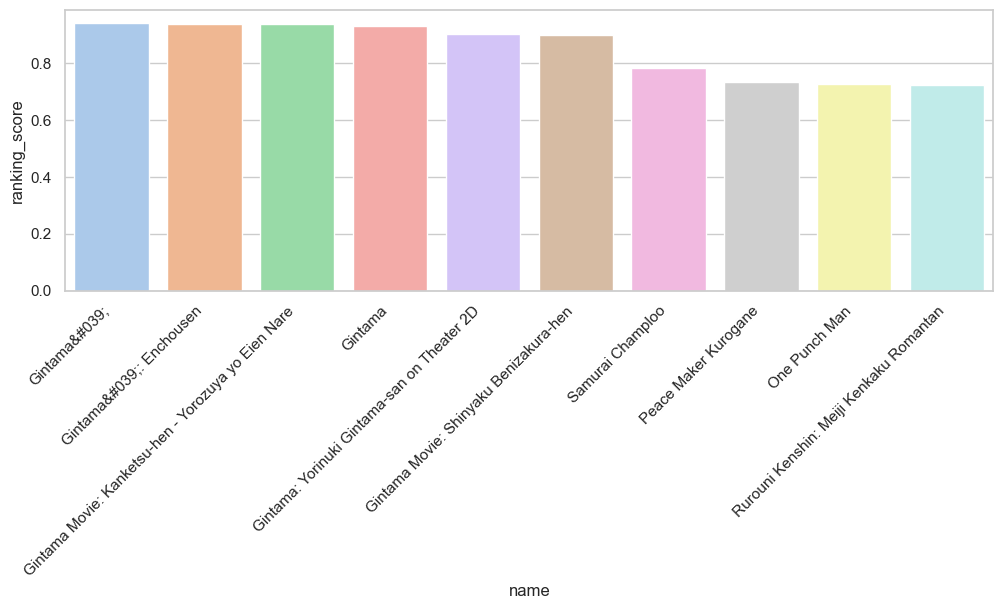

In [994]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

plt_0 = sns.barplot(data=ctb_suggestion_df, x='name',
                    y='ranking_score', ax=axs)
plt_0.set_xticklabels(plt_0.get_xticklabels(),
                      rotation=45, horizontalalignment='right')


## **Recommended System (Collaborative filtering)**

MAE (Mean Absolute Error)
- MAE = 1/n * Σ |y - y^|

Top-K
- Top-K = N/K

AUC
- AUC = (n'+0.5n") / n